In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np

from apidata import (
        closing_prices,
        optimize_portfolio,
        backtest_portfolio
)

In [2]:
# Assets: Google, JPMorgan Chase, Walmart
assets = ["GOOG", "JPM"]

In [3]:
# Optimize Portfolio Weights
portfolio = optimize_portfolio(assets)

[0] Retrieving Stock Data: GOOG
[1] Retrieving Stock Data: JPM

Optimizing Portfolio Weights >> Simulations: x 5000

Optimized Portfolio Weights:
GOOG        0.4440
JPM         0.5560
Return      0.1465
Sharpe      0.2677
Variance    0.1812
Name: 2500, dtype: float64


In [4]:
# Create DataFrame of Historic Returns
performance = backtest_portfolio(portfolio)


Ticker: GOOG 	Portfolio Weight: 0.444
                GOOG
Date                
2014-03-28  0.001215
2014-03-31 -0.002401
2014-04-01  0.008050
2014-04-02 -0.000125
2014-04-03  0.002140

Ticker: JPM 	Portfolio Weight: 0.556
                 JPM
Date                
2014-01-03  0.004282
2014-01-06  0.003213
2014-01-07 -0.006445
2014-01-08  0.005219
2014-01-09 -0.001040

[Historic] Portfolio Performance:
                 GOOG       JPM      RTNp
Date                                    
2014-03-28  0.001215  0.001112  0.002327
2014-03-31 -0.002401  0.006170  0.003769
2014-04-01  0.008050 -0.000366  0.007683
2014-04-02 -0.000125 -0.001744 -0.001869
2014-04-03  0.002140  0.001652  0.003793


In [5]:
# Creating Inversely Correlated Asset
performance["GOOG-INV"] = performance["GOOG"].apply(lambda x: x * -1)

In [6]:
performance.head()

,GOOG,JPM,RTNp,GOOG-INV
Date,,,,
2014-03-28,0.001215,0.001112,0.002327,-0.001215
2014-03-31,-0.002401,0.006170,0.003769,0.002401
2014-04-01,0.008050,-0.000366,0.007683,-0.008050
2014-04-02,-0.000125,-0.001744,-0.001869,0.000125
2014-04-03,0.002140,0.001652,0.003793,-0.002140


Text(0, 0.5, '%Return')

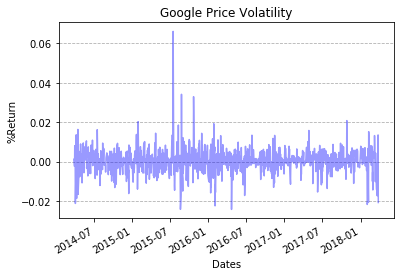

In [7]:
# [Plot] Google - Volatility of Returns (Individual)

performance["GOOG"].plot(color="blue", alpha=0.4
                        )
plt.grid(axis="y", linestyle="dashed")
plt.title("Google Price Volatility")
plt.xlabel("Dates")
plt.ylabel("%Return")


Text(0, 0.5, '% Return')

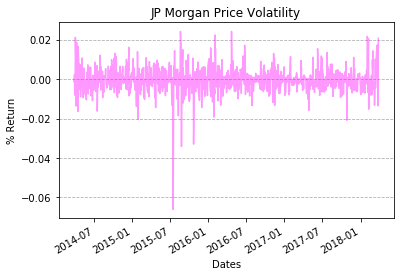

In [8]:
# [Plot] JP Morgan Volatility of Returns (Individual)

performance["GOOG-INV"].plot(color="magenta", alpha=0.4)
plt.grid(axis="y", linestyle="dashed")
plt.title("JP Morgan Price Volatility")
plt.xlabel("Dates")
plt.ylabel("% Return")

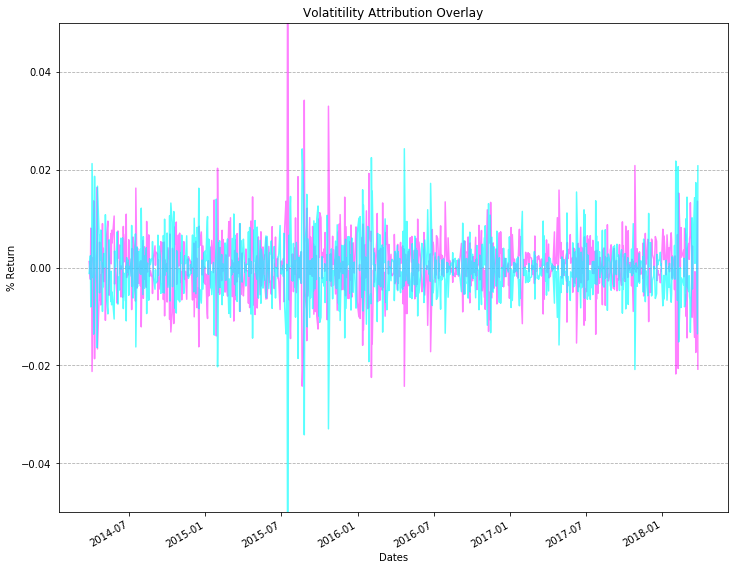

In [9]:
# [Plot] Overlay - Google & JPM Volatility of Returns (Equal Weighting)

performance["GOOG"].plot(color="magenta", alpha=0.5, figsize=(12,10))
performance["GOOG-INV"].plot(color="cyan", alpha=0.65)
#performance["RTNp"].plot(color="green", alpha=0.4)
plt.grid(axis="y", linestyle="dashed")
plt.title("Volatitility Attribution Overlay")
plt.xlabel("Dates")
plt.ylabel("% Return")
plt.ylim(-.05, .05)
plt.show()

Text(0, 0.5, '% Return')

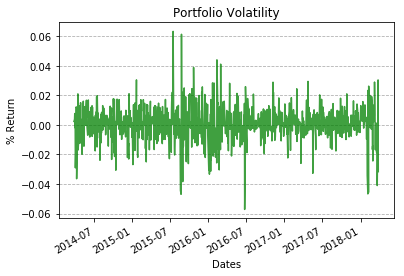

In [10]:
# [Plot] Portfolio - Weighted Portfolio Volatility (Optimized)
# (Shows that portfolio volatility is the net weighted average of the assets comprising it)

performance["RTNp"].plot(color="green", alpha=0.75)
plt.grid(axis="y", linestyle="dashed")
plt.title("Portfolio Volatility")
plt.xlabel("Dates")
plt.ylabel("% Return")